In [1]:
!pip install scikit-learn-intelex
from sklearnex import patch_sklearn
patch_sklearn()


ERROR: Cannot uninstall 'TBB'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.


  Using cached daal-2021.4.0-py2.py3-none-win_amd64.whl (69.0 MB)
  Using cached tbb-2021.10.0-py3-none-win_amd64.whl (284 kB)
  Attempting uninstall: tbb
    Found existing installation: TBB 0.2


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://cdn-images-1.medium.com/max/1600/1*fUKUEUeqgIYU9xlxj4pwhw.png")

Getting setup

In [3]:
!pip uninstall imbalanced-learn -y

Found existing installation: imbalanced-learn 0.11.0
Uninstalling imbalanced-learn-0.11.0:
  Successfully uninstalled imbalanced-learn-0.11.0


In [4]:
#!pip install plotly 
#!pip install chart-studio 
#!pip install -U scikit-learn 

!pip install imbalanced-learn

  Using cached imbalanced_learn-0.11.0-py3-none-any.whl (235 kB)


import required libraries

Import the data from github

In [5]:
#import chart_studio.plotly as py
#import plotly.graph_objs as go
#import plotly as plotly
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTENC
from sklearn import metrics

from sklearn.preprocessing import LabelEncoder

import xgboost as xgb
from xgboost.sklearn import XGBClassifier

import types
import pandas as pd

def __iter__(self): return 0

In [6]:
#Remove the data if you run this notebook more than once
!rm equipment_failure_data_1.csv

'rm' is not recognized as an internal or external command,
operable program or batch file.


In [7]:
#import first half from github
!wget https://raw.githubusercontent.com/shadgriffin/machine_failure/master/equipment_failure_data_1.csv

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [8]:
data=pd.read_csv("dataset.csv")

In [9]:
data

,Unnamed: 0,ID,DATE,REGION_CLUSTER,MAINTENANCE_VENDOR,MANUFACTURER,WELL_GROUP,Mass Air Flow Rate(g/s),OIL PRESSURE,THROTTLE,RPM,Fuel Pressure,AIR INTAKE TEMP,BAROMTRIC PRESSURE(KPA),EQUIPMENT_FAILURE,TYRE PRESSURE,AGE_OF_EQUIPMENT
0,0,100001,12/2/14,G,O,Y,1,11.088000,145.223448,39.34,3501.0,8.426869,1.9,24.610345,0,0.00,880
1,1,100001,12/3/14,G,O,Y,1,8.877943,187.573214,39.20,3489.0,6.483714,1.9,24.671429,0,0.00,881
2,2,100001,12/4/14,G,O,Y,1,8.676444,148.363704,38.87,3459.0,6.159659,2.0,24.733333,0,0.00,882
3,3,100001,12/5/14,G,O,Y,1,9.988338,133.660000,39.47,3513.0,9.320308,2.0,24.773077,0,0.00,883
4,4,100001,12/6/14,G,O,Y,1,8.475264,197.181600,40.33,3589.0,8.022960,1.5,24.808000,0,0.00,884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149850,149850,100612,11/27/16,H,O,V,4,19.680000,0.000000,24.03,7329.0,4.560000,29.0,95.000000,0,73.67,1086
149851,149851,100612,11/28/16,H,O,V,4,28.320000,0.000000,24.36,7429.0,4.600000,30.1,95.000000,0,53.18,1087
149852,149852,100612,11/29/16,H,O,V,4,20.400000,0.000000,24.14,7364.0,3.680000,30.1,94.000000,0,53.70,1088
149853,149853,100612,11/30/16,H,O,V,4,28.320000,0.000000,24.49,7469.0,3.640000,30.1,95.000000,0,73.72,1089


In [10]:
data.head()

,Unnamed: 0,ID,DATE,REGION_CLUSTER,MAINTENANCE_VENDOR,MANUFACTURER,WELL_GROUP,Mass Air Flow Rate(g/s),OIL PRESSURE,THROTTLE,RPM,Fuel Pressure,AIR INTAKE TEMP,BAROMTRIC PRESSURE(KPA),EQUIPMENT_FAILURE,TYRE PRESSURE,AGE_OF_EQUIPMENT
0,0,100001,12/2/14,G,O,Y,1,11.088000,145.223448,39.34,3501.0,8.426869,1.9,24.610345,0,0.0,880
1,1,100001,12/3/14,G,O,Y,1,8.877943,187.573214,39.20,3489.0,6.483714,1.9,24.671429,0,0.0,881
2,2,100001,12/4/14,G,O,Y,1,8.676444,148.363704,38.87,3459.0,6.159659,2.0,24.733333,0,0.0,882
3,3,100001,12/5/14,G,O,Y,1,9.988338,133.660000,39.47,3513.0,9.320308,2.0,24.773077,0,0.0,883
4,4,100001,12/6/14,G,O,Y,1,8.475264,197.181600,40.33,3589.0,8.022960,1.5,24.808000,0,0.0,884


In [11]:
data.shape

(149855, 17)

In [12]:
DataFrame = pd.DataFrame(data.groupby(['ID']).agg(['count']))
DataFrame.shape

(205, 16)

In [13]:
DataFrame = pd.DataFrame(data.groupby(['DATE']).agg(['count']))
DataFrame.shape

(731, 16)

In [14]:
df_failure_thingy=data
df_failure_thingy=df_failure_thingy.drop_duplicates(subset=['ID','DATE'])
df_failure_thingy.shape

(149855, 17)

In [15]:
data.isnull().sum()

Unnamed: 0                 0
ID                         0
DATE                       0
REGION_CLUSTER             0
MAINTENANCE_VENDOR         0
MANUFACTURER               0
WELL_GROUP                 0
Mass Air Flow Rate(g/s)    0
OIL PRESSURE               0
THROTTLE                   0
RPM                        0
Fuel Pressure              0
AIR INTAKE TEMP            0
BAROMTRIC PRESSURE(KPA)    0
EQUIPMENT_FAILURE          0
TYRE PRESSURE              0
AGE_OF_EQUIPMENT           0
dtype: int64

There are no null values in the data set

In [16]:
DataFrame = pd.DataFrame(data.groupby(['EQUIPMENT_FAILURE'])['ID'].agg(['count']))
DataFrame

,count
EQUIPMENT_FAILURE,
0,149650
1,205


In [17]:
data.describe()

,Unnamed: 0,ID,WELL_GROUP,Mass Air Flow Rate(g/s),OIL PRESSURE,THROTTLE,RPM,Fuel Pressure,AIR INTAKE TEMP,BAROMTRIC PRESSURE(KPA),EQUIPMENT_FAILURE,TYRE PRESSURE,AGE_OF_EQUIPMENT
count,149855.000000,149855.000000,149855.000000,149855.000000,149855.000000,149855.000000,149855.000000,149855.000000,149855.000000,149855.000000,149855.000000,149855.000000,149855.000000
mean,74927.000000,100320.419512,2.497561,14.185534,85.918460,35.643733,4557.518000,7.925408,8.229842,110.082879,0.001368,117.481750,2751.146341
std,43259.556632,178.503502,1.093775,8.665254,85.572229,14.723678,2497.993986,2.426462,13.041714,197.356230,0.036961,204.107481,3368.354905
min,0.000000,100001.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-16.490000,0.000000
25%,37463.500000,100164.000000,2.000000,7.548000,0.000000,28.250000,3193.000000,6.596000,0.900000,11.300000,0.000000,8.660000,755.000000
50%,74927.000000,100328.000000,2.000000,11.077500,95.480000,35.020000,4224.000000,8.025600,4.200000,34.000000,0.000000,44.320000,1143.000000
75%,112390.500000,100472.000000,3.000000,22.080000,163.660000,41.940833,5615.000000,9.480700,10.500000,118.900000,0.000000,135.080000,3224.500000
max,149854.000000,100612.000000,4.000000,51.225600,478.470000,570.510000,52767.000000,23.533800,291.100000,3995.900000,1.000000,1824.960000,15170.000000


In [18]:
cor=data.corr( method='pearson')
cor=cor[['EQUIPMENT_FAILURE']]
cor['ABS_EQUIPMENT_FAILURE']=abs(cor['EQUIPMENT_FAILURE'])
cor=cor.sort_values(by=['ABS_EQUIPMENT_FAILURE'], ascending=[False])

In [19]:
cor

,EQUIPMENT_FAILURE,ABS_EQUIPMENT_FAILURE
EQUIPMENT_FAILURE,1.000000e+00,1.000000e+00
Mass Air Flow Rate(g/s),-5.997746e-02,5.997746e-02
OIL PRESSURE,-3.673575e-02,3.673575e-02
BAROMTRIC PRESSURE(KPA),1.283648e-02,1.283648e-02
Fuel Pressure,-8.667327e-03,8.667327e-03
AIR INTAKE TEMP,-8.325554e-03,8.325554e-03
TYRE PRESSURE,7.830244e-03,7.830244e-03
THROTTLE,-5.387080e-03,5.387080e-03
RPM,-4.194914e-03,4.194914e-03
AGE_OF_EQUIPMENT,4.989128e-04,4.989128e-04


In [20]:
data['DATE'] = pd.to_datetime(data['DATE'])

In [21]:
data=data.sort_values(by=['ID','DATE'], ascending=[True, True])

data['flipper'] = np.where((data.ID != data.ID.shift(1)), 1, 0)
data.head()

,Unnamed: 0,ID,DATE,REGION_CLUSTER,MAINTENANCE_VENDOR,MANUFACTURER,WELL_GROUP,Mass Air Flow Rate(g/s),OIL PRESSURE,THROTTLE,RPM,Fuel Pressure,AIR INTAKE TEMP,BAROMTRIC PRESSURE(KPA),EQUIPMENT_FAILURE,TYRE PRESSURE,AGE_OF_EQUIPMENT,flipper
0,0,100001,2014-12-02,G,O,Y,1,11.088000,145.223448,39.34,3501.0,8.426869,1.9,24.610345,0,0.0,880,1
1,1,100001,2014-12-03,G,O,Y,1,8.877943,187.573214,39.20,3489.0,6.483714,1.9,24.671429,0,0.0,881,0
2,2,100001,2014-12-04,G,O,Y,1,8.676444,148.363704,38.87,3459.0,6.159659,2.0,24.733333,0,0.0,882,0
3,3,100001,2014-12-05,G,O,Y,1,9.988338,133.660000,39.47,3513.0,9.320308,2.0,24.773077,0,0.0,883,0
4,4,100001,2014-12-06,G,O,Y,1,8.475264,197.181600,40.33,3589.0,8.022960,1.5,24.808000,0,0.0,884,0


#### Data transformations and Feature Engineering

In [22]:
#Select the first record of each machine
feature_window=21
starter=data[data['flipper'] == 1]
starter=starter[['DATE','ID']]

In [23]:
#rename date to start_date
starter=starter.rename(index=str, columns={"DATE": "START_DATE"})

In [24]:
#convert START_DATE to date
starter['START_DATE'] = pd.to_datetime(starter['START_DATE'])

In [25]:
#Merge START_DATE to the original data set
data=data.sort_values(by=['ID', 'DATE'], ascending=[True, True])
starter=starter.sort_values(by=['ID'], ascending=[True])
data =data.merge(starter, on=['ID'], how='left')

In [26]:
# calculate the number of days since the beginning of each well. 
data['C'] = data['DATE'] - data['START_DATE']
data['TIME_SINCE_START'] = data['C'] / np.timedelta64(1, 'D')
data=data.drop(columns=['C'])
data['too_soon'] = np.where((data.TIME_SINCE_START < feature_window) , 1, 0)

In [27]:
data.rename(columns={'Mass Air Flow Rate(g/s)':'S15'},inplace=True)

In [28]:
data.rename(columns={'Fuel Pressure':'S16'},inplace=True)

In [29]:
data.rename(columns={'OIL PRESSURE':'S17'},inplace=True)

In [30]:
data.rename(columns={'BAROMTRIC PRESSURE(KPA)':'S18'},inplace=True)

In [31]:
data.rename(columns={'AIR INTAKE TEMP':'S19'},inplace=True)

In [32]:
#Crate a running mean, max, min, and median for the sensor variables
data['RPM_mean'] = np.where((data.too_soon == 0),(data['RPM'].rolling(min_periods=1, window=feature_window).mean()) , data.RPM)
data['RPM_median'] = np.where((data.too_soon == 0),(data['RPM'].rolling(min_periods=1, window=feature_window).median()) , data.RPM)
data['RPM_max'] = np.where((data.too_soon == 0),(data['RPM'].rolling(min_periods=1, window=feature_window).max()) , data.RPM)
data['RPM_min'] = np.where((data.too_soon == 0),(data['RPM'].rolling(min_periods=1, window=feature_window).min()) , data.RPM)


data['THROTTLE_mean'] = np.where((data.too_soon == 0),(data['THROTTLE'].rolling(min_periods=1, window=feature_window).mean()) , data.THROTTLE)
data['THROTTLE_median'] = np.where((data.too_soon == 0),(data['THROTTLE'].rolling(min_periods=1, window=feature_window).median()) , data.THROTTLE)
data['THROTTLE_max'] = np.where((data.too_soon == 0),(data['THROTTLE'].rolling(min_periods=1, window=feature_window).max()) , data.THROTTLE)
data['THROTTLE_min'] = np.where((data.too_soon == 0),(data['THROTTLE'].rolling(min_periods=1, window=feature_window).min()) , data.THROTTLE)

data['S15_mean'] = np.where((data.too_soon == 0),(data['S15'].rolling(min_periods=1, window=feature_window).mean()) , data.S15)
data['S15_median'] = np.where((data.too_soon == 0),(data['S15'].rolling(min_periods=1, window=feature_window).median()) , data.S15)
data['S15_max'] = np.where((data.too_soon == 0),(data['S15'].rolling(min_periods=1, window=feature_window).max()) , data.S15)
data['S15_min'] = np.where((data.too_soon == 0),(data['S15'].rolling(min_periods=1, window=feature_window).min()) , data.S15)

data['S16_mean'] = np.where((data.too_soon == 0),(data['S16'].rolling(min_periods=1, window=feature_window).mean()) , data.S16)
data['S16_median'] = np.where((data.too_soon == 0),(data['S16'].rolling(min_periods=1, window=feature_window).median()) , data.S16)
data['S16_max'] = np.where((data.too_soon == 0),(data['S16'].rolling(min_periods=1, window=feature_window).max()) , data.S16)
data['S16_min'] = np.where((data.too_soon == 0),(data['S16'].rolling(min_periods=1, window=feature_window).min()) , data.S16)


data['S17_mean'] = np.where((data.too_soon == 0),(data['S17'].rolling(min_periods=1, window=feature_window).mean()) , data.S17)
data['S17_median'] = np.where((data.too_soon == 0),(data['S17'].rolling(min_periods=1, window=feature_window).median()) , data.S17)
data['S17_max'] = np.where((data.too_soon == 0),(data['S17'].rolling(min_periods=1, window=feature_window).max()) , data.S17)
data['S17_min'] = np.where((data.too_soon == 0),(data['S17'].rolling(min_periods=1, window=feature_window).min()) , data.S17)

data['S18_mean'] = np.where((data.too_soon == 0),(data['S18'].rolling(min_periods=1, window=feature_window).mean()) , data.S18)
data['S18_median'] = np.where((data.too_soon == 0),(data['S18'].rolling(min_periods=1, window=feature_window).median()) , data.S18)
data['S18_max'] = np.where((data.too_soon == 0),(data['S18'].rolling(min_periods=1, window=feature_window).max()) , data.S18)
data['S18_min'] = np.where((data.too_soon == 0),(data['S18'].rolling(min_periods=1, window=feature_window).min()) , data.S18)



data['S19_mean'] = np.where((data.too_soon == 0),(data['S19'].rolling(min_periods=1, window=feature_window).mean()) , data.S19)
data['S19_median'] = np.where((data.too_soon == 0),(data['S19'].rolling(min_periods=1, window=feature_window).median()) , data.S19)
data['S19_max'] = np.where((data.too_soon == 0),(data['S19'].rolling(min_periods=1, window=feature_window).max()) , data.S19)
data['S19_min'] = np.where((data.too_soon == 0),(data['S19'].rolling(min_periods=1, window=feature_window).min()) , data.S19)


data.head()

,Unnamed: 0,ID,DATE,REGION_CLUSTER,MAINTENANCE_VENDOR,MANUFACTURER,WELL_GROUP,S15,S17,THROTTLE,...,S17_max,S17_min,S18_mean,S18_median,S18_max,S18_min,S19_mean,S19_median,S19_max,S19_min
0,0,100001,2014-12-02,G,O,Y,1,11.088000,145.223448,39.34,...,145.223448,145.223448,24.610345,24.610345,24.610345,24.610345,1.9,1.9,1.9,1.9
1,1,100001,2014-12-03,G,O,Y,1,8.877943,187.573214,39.20,...,187.573214,187.573214,24.671429,24.671429,24.671429,24.671429,1.9,1.9,1.9,1.9
2,2,100001,2014-12-04,G,O,Y,1,8.676444,148.363704,38.87,...,148.363704,148.363704,24.733333,24.733333,24.733333,24.733333,2.0,2.0,2.0,2.0
3,3,100001,2014-12-05,G,O,Y,1,9.988338,133.660000,39.47,...,133.660000,133.660000,24.773077,24.773077,24.773077,24.773077,2.0,2.0,2.0,2.0
4,4,100001,2014-12-06,G,O,Y,1,8.475264,197.181600,40.33,...,197.181600,197.181600,24.808000,24.808000,24.808000,24.808000,1.5,1.5,1.5,1.5


In [33]:
data['RPM_chg'] = np.where((data.RPM_mean == 0),0 , data.RPM/data.RPM_mean)


data['THROTTLE_chg'] = np.where((data.THROTTLE_mean == 0),0 , data.THROTTLE/data.THROTTLE_mean)

data['S15_chg'] = np.where((data.S15_mean==0),0 , data.S15/data.S15_mean)
data['S16_chg'] = np.where((data.S16_mean == 0),0 , data.S16/data.S16_mean)
data['S17_chg'] = np.where((data.S17_mean == 0),0 , data.S17/data.S17_mean)
data['S18_chg'] = np.where((data.S18_mean == 0),0 , data.S18/data.S18_mean)
data['S19_chg'] = np.where((data.S19_mean == 0),0 , data.S19/data.S19_mean)

#### Dealing with the small number of failures.

In [34]:
target_window=28
data=data.sort_values(by=['ID', 'DATE'], ascending=[True, True])
data.reset_index(level=0, inplace=True)

In [35]:
df_failure_thingy=data[data['EQUIPMENT_FAILURE'] == 1]
df_failure_thingy=df_failure_thingy[['DATE','ID']]
df_failure_thingy=df_failure_thingy.rename(index=str, columns={"DATE": "FAILURE_DATE"})
data=data.sort_values(by=['ID'], ascending=[True])
df_failure_thingy=df_failure_thingy.sort_values(by=['ID'], ascending=[True])

In [36]:
data =data.merge(df_failure_thingy, on=['ID'], how='left')

In [37]:
data=data.sort_values(by=['ID','DATE'], ascending=[True, True])

data['FAILURE_DATE'] = pd.to_datetime(data['FAILURE_DATE'])
data['DATE'] = pd.to_datetime(data['DATE'])
data['C'] = data['FAILURE_DATE'] - data['DATE']

data['TIME_TO_FAILURE'] = data['C'] / np.timedelta64(1, 'D')

In [38]:
data=data.drop(columns=['index'])

In [39]:
data=data.sort_values(by=['ID', 'DATE'], ascending=[True, True])

In [40]:
data.reset_index(inplace=True)

In [41]:
data.head()

,index,Unnamed: 0,ID,DATE,REGION_CLUSTER,MAINTENANCE_VENDOR,MANUFACTURER,WELL_GROUP,S15,S17,...,RPM_chg,THROTTLE_chg,S15_chg,S16_chg,S17_chg,S18_chg,S19_chg,FAILURE_DATE,C,TIME_TO_FAILURE
0,0,0,100001,2014-12-02,G,O,Y,1,11.088000,145.223448,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2015-04-24,143 days,143.0
1,549,1,100001,2014-12-03,G,O,Y,1,8.877943,187.573214,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2015-04-24,142 days,142.0
2,483,2,100001,2014-12-04,G,O,Y,1,8.676444,148.363704,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2015-04-24,141 days,141.0
3,484,3,100001,2014-12-05,G,O,Y,1,9.988338,133.660000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2015-04-24,140 days,140.0
4,485,4,100001,2014-12-06,G,O,Y,1,8.475264,197.181600,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2015-04-24,139 days,139.0


In [42]:
data['FAILURE_TARGET'] = np.where(((data.TIME_TO_FAILURE < target_window) & ((data.TIME_TO_FAILURE>=0))), 1, 0)

data.head() #Failure target  is equal to 1 if the record proceeds a failure by "failure_window" days or less.

,index,Unnamed: 0,ID,DATE,REGION_CLUSTER,MAINTENANCE_VENDOR,MANUFACTURER,WELL_GROUP,S15,S17,...,THROTTLE_chg,S15_chg,S16_chg,S17_chg,S18_chg,S19_chg,FAILURE_DATE,C,TIME_TO_FAILURE,FAILURE_TARGET
0,0,0,100001,2014-12-02,G,O,Y,1,11.088000,145.223448,...,1.0,1.0,1.0,1.0,1.0,1.0,2015-04-24,143 days,143.0,0
1,549,1,100001,2014-12-03,G,O,Y,1,8.877943,187.573214,...,1.0,1.0,1.0,1.0,1.0,1.0,2015-04-24,142 days,142.0,0
2,483,2,100001,2014-12-04,G,O,Y,1,8.676444,148.363704,...,1.0,1.0,1.0,1.0,1.0,1.0,2015-04-24,141 days,141.0,0
3,484,3,100001,2014-12-05,G,O,Y,1,9.988338,133.660000,...,1.0,1.0,1.0,1.0,1.0,1.0,2015-04-24,140 days,140.0,0
4,485,4,100001,2014-12-06,G,O,Y,1,8.475264,197.181600,...,1.0,1.0,1.0,1.0,1.0,1.0,2015-04-24,139 days,139.0,0


In [43]:
tips_summed = data.groupby(['FAILURE_TARGET'])['RPM'].count()
tips_summed

FAILURE_TARGET
0    144146
1      5709
Name: RPM, dtype: int64

In [44]:
data['FAILURE_TARGET'].mean()

0.03809682693270161

#### Creating the Testing, Training and Validation Groupings

In [45]:
#Getting a Unique List of All IDs 

aa=data
pd_id=aa.drop_duplicates(subset='ID')
pd_id=pd_id[['ID']]
pd_id.shape

(205, 1)

In [46]:
np.random.seed(42)

In [47]:
pd_id['wookie'] = (np.random.randint(0, 10000, pd_id.shape[0]))/10000

In [48]:
pd_id=pd_id[['ID', 'wookie']]

In [49]:
pd_id['MODELING_GROUP'] = np.where(((pd_id.wookie <= 0.35)), 'TRAINING', np.where(((pd_id.wookie <= 0.65)), 'VALIDATION', 'TESTING'))

In [50]:
tips_summed = pd_id.groupby(['MODELING_GROUP'])['wookie'].count()
tips_summed

MODELING_GROUP
TESTING       75
TRAINING      65
VALIDATION    65
Name: wookie, dtype: int64

In [51]:
data=data.sort_values(by=['ID'], ascending=[True])
pd_id=pd_id.sort_values(by=['ID'], ascending=[True])

In [52]:
data =data.merge(pd_id, on=['ID'], how='inner')

data.head()

,index,Unnamed: 0,ID,DATE,REGION_CLUSTER,MAINTENANCE_VENDOR,MANUFACTURER,WELL_GROUP,S15,S17,...,S16_chg,S17_chg,S18_chg,S19_chg,FAILURE_DATE,C,TIME_TO_FAILURE,FAILURE_TARGET,wookie,MODELING_GROUP
0,0,0,100001,2014-12-02,G,O,Y,1,11.088,145.223448,...,1.000000,1.0,1.000000,1.000000,2015-04-24,143 days,143.0,0,0.727,TESTING
1,1,483,100001,2016-03-29,G,O,Y,1,18.960,0.000000,...,1.080334,0.0,0.909801,0.613483,2015-04-24,-340 days,-340.0,0,0.727,TESTING
2,2,484,100001,2016-03-30,G,O,Y,1,29.040,0.000000,...,1.093691,0.0,0.906040,0.677419,2015-04-24,-341 days,-341.0,0,0.727,TESTING
3,3,485,100001,2016-03-31,G,O,Y,1,18.000,0.000000,...,0.910905,0.0,0.919466,0.695035,2015-04-24,-342 days,-342.0,0,0.727,TESTING
4,4,486,100001,2016-04-01,G,O,Y,1,26.160,0.000000,...,1.160104,0.0,0.932363,0.690141,2015-04-24,-343 days,-343.0,0,0.727,TESTING


In [53]:
#Records in a group
tips_summed = data.groupby(['MODELING_GROUP'])['wookie'].count()
tips_summed

MODELING_GROUP
TESTING       54825
TRAINING      47515
VALIDATION    47515
Name: wookie, dtype: int64

In [54]:
#Failures in a group
tips_summed = data.groupby(['MODELING_GROUP'])['FAILURE_TARGET'].sum()
tips_summed

MODELING_GROUP
TESTING       2092
TRAINING      1817
VALIDATION    1800
Name: FAILURE_TARGET, dtype: int32

In [55]:
#Building dataframe for training data
df_training=data[data['MODELING_GROUP'] == 'TRAINING']
df_training=df_training.drop(columns=['MODELING_GROUP','C','wookie','TIME_TO_FAILURE','flipper','START_DATE'])
df_training.shape

(47515, 57)

In [56]:
#Building dataframe for training and testing data
df_train_test=data[data['MODELING_GROUP'] != 'VALIDATION']
df_train_test=df_train_test.drop(columns=['wookie','TIME_TO_FAILURE','flipper','START_DATE'])
df_train_test.shape

(102340, 59)

In [57]:
#Building dataframe for all data
df_total=data.drop(columns=['C','wookie','TIME_TO_FAILURE','flipper','START_DATE'])
df_total.shape

(149855, 58)

#### SMOTE the Training Data

In [58]:
training_features=df_training[['REGION_CLUSTER','MAINTENANCE_VENDOR','MANUFACTURER','WELL_GROUP','AGE_OF_EQUIPMENT','S15','S17','THROTTLE','RPM',
 'S16','S19','S18','TYRE PRESSURE','RPM_mean','RPM_median','RPM_max','RPM_min','THROTTLE_mean','THROTTLE_median','THROTTLE_max','THROTTLE_min','S15_mean','S15_median',
 'S15_max','S15_min','S16_mean','S16_median','S16_max','S16_min','S17_mean','S17_median','S17_max','S17_min','S18_mean','S18_median','S18_max','S18_min','S19_mean','S19_median','S19_max','S19_min',
 'RPM_chg','THROTTLE_chg','S15_chg','S16_chg','S17_chg','S18_chg','S19_chg']]

In [59]:
training_target=df_training[['FAILURE_TARGET']]

In [60]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTENC
smx = SMOTENC(random_state=12,  categorical_features=[0, 1, 2, 3])

In [61]:
x_res, y_res = smx.fit_resample(training_features, training_target.values.ravel())

In [63]:
#Formating independent variable
df_x=pd.DataFrame(x_res)
df_x.columns = [
'REGION_CLUSTER','MAINTENANCE_VENDOR','MANUFACTURER','WELL_GROUP','AGE_OF_EQUIPMENT','S15','S17','THROTTLE','RPM',
 'S16','S19','S18','TYRE PRESSURE','RPM_mean','RPM_median','RPM_max','RPM_min','THROTTLE_mean','THROTTLE_median','THROTTLE_max','THROTTLE_min','S15_mean','S15_median',
 'S15_max','S15_min','S16_mean','S16_median','S16_max','S16_min','S17_mean','S17_median','S17_max','S17_min','S18_mean','S18_median','S18_max','S18_min','S19_mean','S19_median','S19_max','S19_min',
 'RPM_chg','THROTTLE_chg','S15_chg','S16_chg','S17_chg','S18_chg','S19_chg']
df_x.head()

,REGION_CLUSTER,MAINTENANCE_VENDOR,MANUFACTURER,WELL_GROUP,AGE_OF_EQUIPMENT,S15,S17,THROTTLE,RPM,S16,...,S19_median,S19_max,S19_min,RPM_chg,THROTTLE_chg,S15_chg,S16_chg,S17_chg,S18_chg,S19_chg
0,C,L,T,1,888,9.7416,157.92,35.34,3145.0,7.2556,...,0.9,0.9,0.9,0.970280,0.970371,1.199164,1.008609,0.855041,0.750000,1.0
1,C,L,T,1,887,6.5736,211.68,36.08,3211.0,6.6483,...,0.9,0.9,0.9,0.988637,0.988687,0.816393,0.927402,1.138659,1.105263,1.0
2,C,L,T,1,886,8.7120,157.92,35.93,3198.0,5.6848,...,0.9,0.9,0.9,0.984268,0.984212,1.125731,0.785924,0.898177,0.777778,1.0
3,C,L,T,1,882,7.0488,150.40,35.60,3168.0,6.6572,...,0.9,0.9,0.9,0.969701,0.969831,0.972425,0.923005,0.892867,1.166667,1.0
4,C,L,T,1,884,7.2072,213.57,34.75,3093.0,7.2556,...,0.9,0.9,0.9,0.951390,0.951327,0.985052,0.984588,1.253920,1.188679,1.0


In [64]:
#formating depndent variable
df_y=pd.DataFrame(y_res)
df_y.columns = ['FAILURE_TARGET']

In [65]:
df_y.mean(axis = 0) 

FAILURE_TARGET    0.5
dtype: float64

In [66]:
#merging dependent and independent variables into a dataframe
df_balanced = pd.concat([df_y, df_x], axis=1)
df_balanced.head()

,FAILURE_TARGET,REGION_CLUSTER,MAINTENANCE_VENDOR,MANUFACTURER,WELL_GROUP,AGE_OF_EQUIPMENT,S15,S17,THROTTLE,RPM,...,S19_median,S19_max,S19_min,RPM_chg,THROTTLE_chg,S15_chg,S16_chg,S17_chg,S18_chg,S19_chg
0,0,C,L,T,1,888,9.7416,157.92,35.34,3145.0,...,0.9,0.9,0.9,0.970280,0.970371,1.199164,1.008609,0.855041,0.750000,1.0
1,0,C,L,T,1,887,6.5736,211.68,36.08,3211.0,...,0.9,0.9,0.9,0.988637,0.988687,0.816393,0.927402,1.138659,1.105263,1.0
2,0,C,L,T,1,886,8.7120,157.92,35.93,3198.0,...,0.9,0.9,0.9,0.984268,0.984212,1.125731,0.785924,0.898177,0.777778,1.0
3,0,C,L,T,1,882,7.0488,150.40,35.60,3168.0,...,0.9,0.9,0.9,0.969701,0.969831,0.972425,0.923005,0.892867,1.166667,1.0
4,0,C,L,T,1,884,7.2072,213.57,34.75,3093.0,...,0.9,0.9,0.9,0.951390,0.951327,0.985052,0.984588,1.253920,1.188679,1.0


#### Data Tranformation and feature engineering

In [67]:
#Converting categorical data into binary variables
df_dv = pd.get_dummies(df_balanced['REGION_CLUSTER'])
df_dv=df_dv.rename(columns={"A": "CLUSTER_A","B":"CLUSTER_B","C":"CLUSTER_C","D":"CLUSTER_D","E":"CLUSTER_E","F":"CLUSTER_F","G":"CLUSTER_G","H":"CLUSTER_H"})
df_balanced= pd.concat([df_balanced, df_dv], axis=1)
df_dv = pd.get_dummies(df_balanced['MAINTENANCE_VENDOR'])
df_dv=df_dv.rename(columns={"I": "MV_I","J":"MV_J","K":"MV_K","L":"MV_L","M":"MV_M","N":"MV_N","O":"MV_O","P":"MV_P"})
df_balanced = pd.concat([df_balanced, df_dv], axis=1)
df_dv = pd.get_dummies(df_balanced['MANUFACTURER'])
df_dv=df_dv.rename(columns={"Q": "MN_Q","R":"MN_R","S":"MN_S","T":"MN_T","U":"MN_U","V":"MN_V","W":"MN_W","X":"MN_X","Y":"MN_Y","Z":"MN_Z"})
df_balanced = pd.concat([df_balanced, df_dv], axis=1)
df_dv = pd.get_dummies(df_balanced['WELL_GROUP'])
df_dv=df_dv.rename(columns={1: "WG_1",2:"WG_2",3:"WG_3",4:"WG_4",5:"WG_5",6:"WG_6",7:"WG_7",8:"WG_8"})
df_balanced = pd.concat([df_balanced, df_dv], axis=1)

In [68]:
df_dv = pd.get_dummies(df_train_test['REGION_CLUSTER'])
df_dv=df_dv.rename(columns={"A": "CLUSTER_A","B":"CLUSTER_B","C":"CLUSTER_C","D":"CLUSTER_D","E":"CLUSTER_E","F":"CLUSTER_F","G":"CLUSTER_G","H":"CLUSTER_H"})
df_train_test= pd.concat([df_train_test, df_dv], axis=1)
df_dv = pd.get_dummies(df_train_test['MAINTENANCE_VENDOR'])
df_dv=df_dv.rename(columns={"I": "MV_I","J":"MV_J","K":"MV_K","L":"MV_L","M":"MV_M","N":"MV_N","O":"MV_O","P":"MV_P"})
df_train_test = pd.concat([df_train_test, df_dv], axis=1)
df_dv = pd.get_dummies(df_train_test['MANUFACTURER'])
df_dv=df_dv.rename(columns={"Q": "MN_Q","R":"MN_R","S":"MN_S","T":"MN_T","U":"MN_U","V":"MN_V","W":"MN_W","X":"MN_X","Y":"MN_Y","Z":"MN_Z"})
df_train_test = pd.concat([df_train_test, df_dv], axis=1)
df_dv = pd.get_dummies(df_train_test['WELL_GROUP'])
df_dv=df_dv.rename(columns={1: "WG_1",2:"WG_2",3:"WG_3",4:"WG_4",5:"WG_5",6:"WG_6",7:"WG_7",8:"WG_8"})
df_train_test = pd.concat([df_train_test, df_dv], axis=1)

In [69]:
f_dv = pd.get_dummies(df_total['REGION_CLUSTER'])
df_dv=df_dv.rename(columns={"A": "CLUSTER_A","B":"CLUSTER_B","C":"CLUSTER_C","D":"CLUSTER_D","E":"CLUSTER_E","F":"CLUSTER_F","G":"CLUSTER_G","H":"CLUSTER_H"})
df_total= pd.concat([df_total, df_dv], axis=1)
df_dv = pd.get_dummies(df_total['MAINTENANCE_VENDOR'])
df_dv=df_dv.rename(columns={"I": "MV_I","J":"MV_J","K":"MV_K","L":"MV_L","M":"MV_M","N":"MV_N","O":"MV_O","P":"MV_P"})
df_total = pd.concat([df_total, df_dv], axis=1)
df_dv = pd.get_dummies(df_total['MANUFACTURER'])
df_dv=df_dv.rename(columns={"Q": "MN_Q","R":"MN_R","S":"MN_S","T":"MN_T","U":"MN_U","V":"MN_V","W":"MN_W","X":"MN_X","Y":"MN_Y","Z":"MN_Z"})
df_total = pd.concat([df_total, df_dv], axis=1)
df_dv = pd.get_dummies(df_total['WELL_GROUP'])
df_dv=df_dv.rename(columns={1: "WG_1",2:"WG_2",3:"WG_3",4:"WG_4",5:"WG_5",6:"WG_6",7:"WG_7",8:"WG_8"})
df_total = pd.concat([df_total, df_dv], axis=1)

#### Building the model on balance data

In [70]:
df_balanced=df_balanced.drop(columns=['REGION_CLUSTER','MAINTENANCE_VENDOR','MANUFACTURER','WELL_GROUP'])

In [71]:
#seperating the dependent and independent variable
features = [x for x in df_balanced.columns if x not in ['FAILURE_TARGET']]  
dependent=pd.DataFrame(df_balanced['FAILURE_TARGET'])
independent=df_balanced.drop(columns=['FAILURE_TARGET'])

In [72]:
df_balanced.head()

,FAILURE_TARGET,AGE_OF_EQUIPMENT,S15,S17,THROTTLE,RPM,S16,S19,S18,TYRE PRESSURE,...,MN_U,MN_V,MN_W,MN_X,MN_Y,MN_Z,WG_1,WG_2,WG_3,WG_4
0,0,888,9.7416,157.92,35.34,3145.0,7.2556,0.9,0.2,0.01,...,0,0,0,0,0,0,1,0,0,0
1,0,887,6.5736,211.68,36.08,3211.0,6.6483,0.9,0.3,40.85,...,0,0,0,0,0,0,1,0,0,0
2,0,886,8.7120,157.92,35.93,3198.0,5.6848,0.9,0.2,40.86,...,0,0,0,0,0,0,1,0,0,0
3,0,882,7.0488,150.40,35.60,3168.0,6.6572,0.9,0.3,40.87,...,0,0,0,0,0,0,1,0,0,0
4,0,884,7.2072,213.57,34.75,3093.0,7.2556,0.9,0.3,0.01,...,0,0,0,0,0,0,1,0,0,0


In [73]:
import matplotlib.pylab as plt
%matplotlib inline

def evaluate_model(alg, train, target, predictors,  early_stopping_rounds=1): 
#Fit the algorithm on the data
    alg.fit(train[predictors], target['FAILURE_TARGET'], eval_metric='error')
        
 #Predict training set:
    dtrain_predictions = alg.predict(train[predictors])
    dtrain_predprob = alg.predict_proba(train[predictors])[:,1]
    
    feat_imp = pd.Series(alg.get_booster().get_fscore()).sort_values(ascending=False) 
    feat_imp.plot(kind='bar', title='Feature Importance', color='g') 
    plt.ylabel('Feature Importance Score')
        
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % metrics.accuracy_score(target['FAILURE_TARGET'].values, dtrain_predictions))
    print("AUC Score (Balanced): %f" % metrics.roc_auc_score(target['FAILURE_TARGET'], dtrain_predprob))

In [74]:
#Defining parameter values
estimator_vals=160
lr_vals = 0.8
md_vals = 12
mcw_vals = 0.5
gamma_vals =.1
subsample_vals = .5
c_bt_vals = 1
reg_lambda_vals = 1
reg_alpha_vals = 1

In [75]:
#Defining the model
xgb0 = XGBClassifier(objective = 'binary:logistic',use_label_encoder=False,learning_rate = lr_vals,
n_estimators=estimator_vals,max_depth=md_vals,min_child_weight=mcw_vals,
gamma=gamma_vals,subsample=subsample_vals,colsample_bytree=c_bt_vals,
reg_lambda=reg_lambda_vals,reg_alpha=reg_alpha_vals);

C:\Users\elish\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


C:\Users\elish\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(



Model Report
Accuracy : 1
AUC Score (Balanced): 1.000000


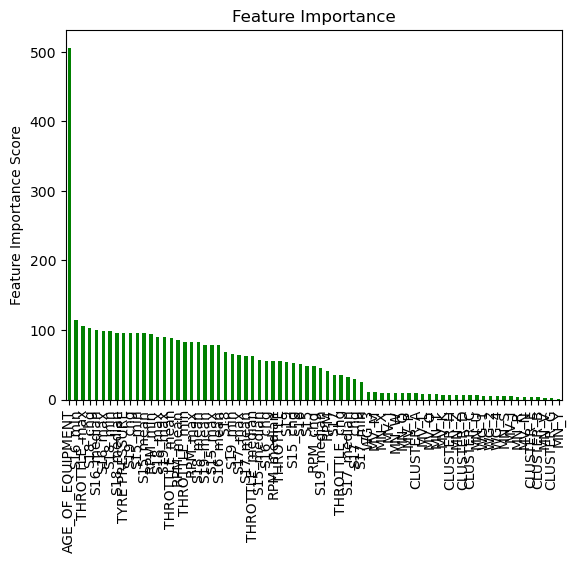

In [76]:
evaluate_model(xgb0, independent, dependent,features) 

In [77]:
#Evaluating model with accuracy and AUC Score
df_testing=df_train_test[df_train_test['MODELING_GROUP'] == 'TESTING'].copy()
df_training=df_train_test[df_train_test['MODELING_GROUP'] != 'TESTING'].copy()

In [78]:
#Evaluating the unbalanced data
df_training['P_FAIL']= xgb0.predict_proba(df_training[features])[:,1];
df_training['Y_FAIL'] = np.where(((df_training.P_FAIL <= .50)), 0, 1)
#Print model report:
print("Accuracy : %.4g" % metrics.accuracy_score(df_training['FAILURE_TARGET'].values, df_training['Y_FAIL']))
print("AUC Score (Train): %f" % metrics.roc_auc_score(df_training['FAILURE_TARGET'], df_training['P_FAIL']))

Accuracy : 1
AUC Score (Train): 1.000000


In [79]:
df_testing['P_FAIL']= xgb0.predict_proba(df_testing[features])[:,1];
df_testing['Y_FAIL'] = np.where(((df_testing.P_FAIL <= .50)), 0, 1)
#Print model report:
print("Accuracy : %.4g" % metrics.accuracy_score(df_testing['FAILURE_TARGET'].values, df_testing['Y_FAIL']))
print("AUC Score (Train): %f" % metrics.roc_auc_score(df_testing['FAILURE_TARGET'], df_testing['P_FAIL']))

Accuracy : 0.9444
AUC Score (Train): 0.574770


In [80]:
#Evaluating the model with simple confusion matrix
print(pd.crosstab(df_testing.Y_FAIL, df_testing.EQUIPMENT_FAILURE, dropna=False))

EQUIPMENT_FAILURE      0   1
Y_FAIL                      
0                  53685  72
1                   1065   3


In [81]:
print(pd.crosstab(df_testing.Y_FAIL, df_testing.FAILURE_TARGET, dropna=False))

FAILURE_TARGET      0     1
Y_FAIL                     
0               51720  2037
1                1013    55


In [82]:
forecast_window=90
cutoff=0.5
df=df_train_test
df['P_FAIL']= xgb0.predict_proba(df[features])[:,1];
df['Y_FAIL'] = np.where(((df.P_FAIL <= cutoff)), 0, 1)

In [83]:
pd_id=df.drop_duplicates(subset='ID')
pd_id=pd_id[['ID']]
pd_id.shape

(140, 1)

In [84]:
pd_id=pd_id.reset_index(drop=True)
pd_id=pd_id.reset_index(drop=False)
pd_id=pd_id.rename(columns={"index": "IDs"})
pd_id['IDs']=pd_id['IDs']+1
pd_id.head()

,IDs,ID
0,1,100001
1,2,100003
2,3,100019
3,4,100036
4,5,100040


In [85]:
column = pd_id["IDs"]
max_value = column.max()+1
max_value

141

In [86]:
df=df.sort_values(by=['ID'], ascending=[True])
pd_id=pd_id.sort_values(by=['ID'], ascending=[True])
df =df.merge(pd_id, on=['ID'], how='inner')
df.head()

,index,Unnamed: 0,ID,DATE,REGION_CLUSTER,MAINTENANCE_VENDOR,MANUFACTURER,WELL_GROUP,S15,S17,...,MN_X,MN_Y,MN_Z,WG_1,WG_2,WG_3,WG_4,P_FAIL,Y_FAIL,IDs
0,0,0,100001,2014-12-02,G,O,Y,1,11.088000,145.223448,...,0,1,0,1,0,0,0,0.000033,0,1
1,483,2,100001,2014-12-04,G,O,Y,1,8.676444,148.363704,...,0,1,0,1,0,0,0,0.000042,0,1
2,484,3,100001,2014-12-05,G,O,Y,1,9.988338,133.660000,...,0,1,0,1,0,0,0,0.000009,0,1
3,485,4,100001,2014-12-06,G,O,Y,1,8.475264,197.181600,...,0,1,0,1,0,0,0,0.000292,0,1
4,486,5,100001,2014-12-07,G,O,Y,1,7.971100,164.545833,...,0,1,0,1,0,0,0,0.000050,0,1


In [87]:
df=df.sort_values(by=['ID','DATE'], ascending=[True,True])

#reset index
df=df.reset_index(drop=True)

In [88]:
#creating a null dataframe 
df_fred=df
df_fred['Y_FAIL_sumxx']=0
df_fred=df_fred[df_fred['IDs'] == max_value+1]
df_fred.shape

#sum the number of signals occuring over the last 90 days for each machine individually
for x in range(max_value):
        dffx=df[df['IDs'] ==x]
        dff=dffx.copy()
        dff['Y_FAIL_sumxx'] =(dff['Y_FAIL'].rolling(min_periods=1, window=(forecast_window)).sum())
        df_fred= pd.concat([df_fred,dff])
        
df=df_fred

# if a signal has occured in the last 90 days, the signal is 0.
df['Y_FAILZ']=np.where((df.Y_FAIL_sumxx>1), 0, df.Y_FAIL)


In [89]:
df['SIGNAL_ID'] = df['Y_FAILZ'].cumsum()

In [90]:
df_signals=df[df['Y_FAILZ'] == 1]
df_signal_date=df_signals[['SIGNAL_ID','DATE','ID']]
df_signal_date=df_signal_date.rename(index=str, columns={"DATE": "SIGNAL_DATE"})
df_signal_date=df_signal_date.rename(index=str, columns={"ID": "ID_OF_SIGNAL"})

In [91]:
df_signal_date.shape

(117, 3)

In [92]:
df =df.merge(df_signal_date, on=['SIGNAL_ID'], how='outer') 
df.copy()

,index,Unnamed: 0,ID,DATE,REGION_CLUSTER,MAINTENANCE_VENDOR,MANUFACTURER,WELL_GROUP,S15,S17,...,WG_3,WG_4,P_FAIL,Y_FAIL,IDs,Y_FAIL_sumxx,Y_FAILZ,SIGNAL_ID,SIGNAL_DATE,ID_OF_SIGNAL
0,0,0,100001,2014-12-02,G,O,Y,1,11.088000,145.223448,...,0,0,0.000033,0,1,0.0,0,0,NaT,NaN
1,549,1,100001,2014-12-03,G,O,Y,1,8.877943,187.573214,...,0,0,0.000112,0,1,0.0,0,0,NaT,NaN
2,483,2,100001,2014-12-04,G,O,Y,1,8.676444,148.363704,...,0,0,0.000042,0,1,0.0,0,0,NaT,NaN
3,484,3,100001,2014-12-05,G,O,Y,1,9.988338,133.660000,...,0,0,0.000009,0,1,0.0,0,0,NaT,NaN
4,485,4,100001,2014-12-06,G,O,Y,1,8.475264,197.181600,...,0,0,0.000292,0,1,0.0,0,0,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102335,149368,149850,100612,2016-11-27,H,O,V,4,19.680000,0.000000,...,0,1,0.000215,0,140,10.0,0,117,2016-08-12,100612.0
102336,149369,149851,100612,2016-11-28,H,O,V,4,28.320000,0.000000,...,0,1,0.000224,0,140,9.0,0,117,2016-08-12,100612.0
102337,149304,149852,100612,2016-11-29,H,O,V,4,20.400000,0.000000,...,0,1,0.000302,0,140,8.0,0,117,2016-08-12,100612.0
102338,149604,149853,100612,2016-11-30,H,O,V,4,28.320000,0.000000,...,0,1,0.000173,0,140,7.0,0,117,2016-08-12,100612.0


In [93]:
df=df[['DATE', 'ID', 'EQUIPMENT_FAILURE', 'FAILURE_TARGET','FAILURE_DATE',
       'P_FAIL', 'Y_FAILZ','SIGNAL_ID',
       'SIGNAL_DATE','ID_OF_SIGNAL','MODELING_GROUP']]

In [94]:
df['C'] = df['FAILURE_DATE'] - df['SIGNAL_DATE'].copy()
df['WARNING'] = df['C'] / np.timedelta64(1, 'D').copy()

In [95]:
df['TRUE_POSITIVE'] = np.where(((df.EQUIPMENT_FAILURE == 1) & (df.WARNING<=forecast_window) &(df.WARNING>=0) & (df.ID_OF_SIGNAL==df.ID)), 1, 0)

In [96]:
# define a false negative
df['FALSE_NEGATIVE'] = np.where((df.TRUE_POSITIVE==0) & (df.EQUIPMENT_FAILURE==1), 1, 0)

In [97]:
# define a false positive
df['BAD_S']=np.where((df.WARNING<0) | (df.WARNING>=forecast_window | df.WARNING.isnull().values.any()), 1, 0)
df['FALSE_POSITIVE'] = np.where(((df.Y_FAILZ == 1) & (df.BAD_S==1) & (df.ID_OF_SIGNAL==df.ID)), 1, 0)
df['bootie']=1
df['CATEGORY']=np.where((df.FALSE_POSITIVE==1),'FALSE_POSITIVE',
                                      (np.where((df.FALSE_NEGATIVE==1),'FALSE_NEGATIVE',
                                                (np.where((df.TRUE_POSITIVE==1),'TRUE_POSITIVE','TRUE_NEGATIVE')))))

In [98]:
df.head()

,DATE,ID,EQUIPMENT_FAILURE,FAILURE_TARGET,FAILURE_DATE,P_FAIL,Y_FAILZ,SIGNAL_ID,SIGNAL_DATE,ID_OF_SIGNAL,MODELING_GROUP,C,WARNING,TRUE_POSITIVE,FALSE_NEGATIVE,BAD_S,FALSE_POSITIVE,bootie,CATEGORY
0,2014-12-02,100001,0,0,2015-04-24,0.000033,0,0,NaT,NaN,TESTING,NaT,NaN,0,0,0,0,1,TRUE_NEGATIVE
1,2014-12-03,100001,0,0,2015-04-24,0.000112,0,0,NaT,NaN,TESTING,NaT,NaN,0,0,0,0,1,TRUE_NEGATIVE
2,2014-12-04,100001,0,0,2015-04-24,0.000042,0,0,NaT,NaN,TESTING,NaT,NaN,0,0,0,0,1,TRUE_NEGATIVE
3,2014-12-05,100001,0,0,2015-04-24,0.000009,0,0,NaT,NaN,TESTING,NaT,NaN,0,0,0,0,1,TRUE_NEGATIVE
4,2014-12-06,100001,0,0,2015-04-24,0.000292,0,0,NaT,NaN,TESTING,NaT,NaN,0,0,0,0,1,TRUE_NEGATIVE


In [99]:
pd.options.display.max_rows = 1000
dd=df[df['ID']==100001]
dd.head(1000)

,DATE,ID,EQUIPMENT_FAILURE,FAILURE_TARGET,FAILURE_DATE,P_FAIL,Y_FAILZ,SIGNAL_ID,SIGNAL_DATE,ID_OF_SIGNAL,MODELING_GROUP,C,WARNING,TRUE_POSITIVE,FALSE_NEGATIVE,BAD_S,FALSE_POSITIVE,bootie,CATEGORY
0,2014-12-02,100001,0,0,2015-04-24,3.284410e-05,0,0,NaT,NaN,TESTING,NaT,NaN,0,0,0,0,1,TRUE_NEGATIVE
1,2014-12-03,100001,0,0,2015-04-24,1.121648e-04,0,0,NaT,NaN,TESTING,NaT,NaN,0,0,0,0,1,TRUE_NEGATIVE
2,2014-12-04,100001,0,0,2015-04-24,4.241272e-05,0,0,NaT,NaN,TESTING,NaT,NaN,0,0,0,0,1,TRUE_NEGATIVE
3,2014-12-05,100001,0,0,2015-04-24,8.633252e-06,0,0,NaT,NaN,TESTING,NaT,NaN,0,0,0,0,1,TRUE_NEGATIVE
4,2014-12-06,100001,0,0,2015-04-24,2.924242e-04,0,0,NaT,NaN,TESTING,NaT,NaN,0,0,0,0,1,TRUE_NEGATIVE
5,2014-12-07,100001,0,0,2015-04-24,4.980907e-05,0,0,NaT,NaN,TESTING,NaT,NaN,0,0,0,0,1,TRUE_NEGATIVE
6,2014-12-08,100001,0,0,2015-04-24,5.594048e-05,0,0,NaT,NaN,TESTING,NaT,NaN,0,0,0,0,1,TRUE_NEGATIVE
7,2014-12-09,100001,0,0,2015-04-24,1.971915e-05,0,0,NaT,NaN,TESTING,NaT,NaN,0,0,0,0,1,TRUE_NEGATIVE
8,2014-12-10,100001,0,0,2015-04-24,3.523389e-06,0,0,NaT,NaN,TESTING,NaT,NaN,0,0,0,0,1,TRUE_NEGATIVE
9,2014-12-11,100001,0,0,2015-04-24,4.345777e-05,0,0,NaT,NaN,TESTING,NaT,NaN,0,0,0,0,1,TRUE_NEGATIVE


In [100]:
table = pd.pivot_table(df, values=['bootie'], index=['MODELING_GROUP'],columns=['CATEGORY'], aggfunc=np.sum)
table

bootie                                           
CATEGORY       FALSE_NEGATIVE FALSE_POSITIVE TRUE_NEGATIVE TRUE_POSITIVE
MODELING_GROUP                                                          
TESTING                  66.0           43.0       54707.0           9.0
TRAINING                  NaN            NaN       47450.0          65.0

In [101]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://cdn-images-1.medium.com/max/1600/1*fUKUEUeqgIYU9xlxj4pwhw.png")

In [102]:
df['TOTAL_COST']=df.FALSE_NEGATIVE*30000+df.FALSE_POSITIVE*1500+df.TRUE_POSITIVE*7500

In [103]:
table = pd.pivot_table(df, values=['TOTAL_COST'],index=['MODELING_GROUP'], aggfunc=np.sum)
table

,TOTAL_COST
MODELING_GROUP,
TESTING,2112000
TRAINING,487500


In [104]:
wells=df[['ID','MODELING_GROUP']]
wells=wells.drop_duplicates(subset='ID')
wells = wells.groupby(['MODELING_GROUP'])['ID'].count()
wells=pd.DataFrame(wells)
wells=wells.rename(columns={"ID": "WELLS"})
wells

,WELLS
MODELING_GROUP,
TESTING,75
TRAINING,65


In [105]:
tc = df.groupby(['MODELING_GROUP'])['TOTAL_COST'].sum()
tc=pd.DataFrame(tc)

In [106]:
ac =tc.merge(wells, on=['MODELING_GROUP'], how='inner')

In [107]:
ac['AVERAGE_COST']=ac.TOTAL_COST/ac.WELLS
ac['LIFT']=27948-ac.AVERAGE_COST
ac

,TOTAL_COST,WELLS,AVERAGE_COST,LIFT
MODELING_GROUP,,,,
TESTING,2112000,75,28160.0,-212.0
TRAINING,487500,65,7500.0,20448.0


In [108]:
#Fine tuning
forecast_window=90
cutoff=0.02

In [109]:
df=df_train_test

In [110]:
df_testing['P_FAIL']= xgb0.predict_proba(df_testing[features])[:,1];
df_testing['Y_FAIL'] = np.where(((df_testing.P_FAIL <= .50)), 0, 1)
#create a unique list of machines
pd_id=df.drop_duplicates(subset='ID')
pd_id=pd_id[['ID']]


#label each machine with a sequential number
pd_id=pd_id.reset_index(drop=True)
pd_id=pd_id.reset_index(drop=False)
pd_id=pd_id.rename(columns={"index": "IDs"})
pd_id['IDs']=pd_id['IDs']+1
pd_id.head()

#grab the max number of machines +1

column = pd_id["IDs"]
max_value = column.max()+1
max_value

#append sequential number to main file.  Now each machine has a sequencial id.
df=df.sort_values(by=['ID'], ascending=[True])
pd_id=pd_id.sort_values(by=['ID'], ascending=[True])
df =df.merge(pd_id, on=['ID'], how='inner')
df.head()

#sort data
df=df.sort_values(by=['ID','DATE'], ascending=[True,True])

#reset index
df=df.reset_index(drop=True)

#create a null dataframe for the next step
df_fred=df
df_fred['Y_FAIL_sumxx']=0
df_fred=df_fred[df_fred['IDs'] == max_value+1]
df_fred.shape

#sum the number of signals occuring over the last 90 days for each machine individually

for x in range(max_value):
        dffx=df[df['IDs'] ==x]
        dff=dffx.copy()
        dff['Y_FAIL_sumxx'] =(dff['Y_FAIL'].rolling(min_periods=1, window=(forecast_window)).sum())
        df_fred= pd.concat([df_fred,dff])
        
        
df=df_fred

# if a signal has occured in the last 90 days, the signal is 0.
df['Y_FAILZ']=np.where((df.Y_FAIL_sumxx>1), 0, df.Y_FAIL)


#sort the data by id and date.

df=df.sort_values(by=['ID','DATE'], ascending=[True, True])
#create signal id with the cumsum function.
df['SIGNAL_ID'] = df['Y_FAILZ'].cumsum()


df_signals=df[df['Y_FAILZ'] == 1]
df_signal_date=df_signals[['SIGNAL_ID','DATE','ID']]
df_signal_date=df_signal_date.rename(index=str, columns={"DATE": "SIGNAL_DATE"})
df_signal_date=df_signal_date.rename(index=str, columns={"ID": "ID_OF_SIGNAL"})



df=df.merge(df_signal_date, on=['SIGNAL_ID'], how='outer') 


df=df[['DATE', 'ID', 'EQUIPMENT_FAILURE', 'FAILURE_TARGET','FAILURE_DATE',
       'P_FAIL', 'Y_FAILZ','SIGNAL_ID',
       'SIGNAL_DATE','ID_OF_SIGNAL','MODELING_GROUP']]



df['C'] = df['FAILURE_DATE'] - df['SIGNAL_DATE']
df['WARNING'] = df['C'] / np.timedelta64(1, 'D')

In [111]:
# define a true positive
df['TRUE_POSITIVE'] = np.where(((df.EQUIPMENT_FAILURE == 1) & (df.WARNING<=forecast_window) &(df.WARNING>=0) & (df.ID_OF_SIGNAL==df.ID)), 1, 0)

# define a false negative
df['FALSE_NEGATIVE'] = np.where((df.TRUE_POSITIVE==0) & (df.EQUIPMENT_FAILURE==1), 1, 0)

# define a false positive
df['BAD_S']=np.where((df.WARNING<0) | (df.WARNING>=forecast_window), 1, 0)

df['FALSE_POSITIVE'] = np.where(((df.Y_FAILZ == 1) & (df.BAD_S==1) & (df.ID_OF_SIGNAL==df.ID)), 1, 0)

df['bootie']=1

df['CATEGORY']=np.where((df.FALSE_POSITIVE==1),'FALSE_POSITIVE',
                                      (np.where((df.FALSE_NEGATIVE==1),'FALSE_NEGATIVE',
                                                (np.where((df.TRUE_POSITIVE==1),'TRUE_POSITIVE','TRUE_NEGATIVE')))))

In [112]:
table = pd.pivot_table(df, values=['bootie'], index=['MODELING_GROUP'],columns=['CATEGORY'], aggfunc=np.sum)
table

bootie                                           
CATEGORY       FALSE_NEGATIVE FALSE_POSITIVE TRUE_NEGATIVE TRUE_POSITIVE
MODELING_GROUP                                                          
TESTING                  66.0           44.0       54706.0           9.0
TRAINING                  NaN            NaN       47450.0          65.0

In [113]:
#Now we can calculate the total cost.
df['TOTAL_COST']=df.FALSE_NEGATIVE*30000+df.FALSE_POSITIVE*1500+df.TRUE_POSITIVE*7500
#Aggregate the costs by modeling group.
table = pd.pivot_table(df, values=['TOTAL_COST'],index=['MODELING_GROUP'], aggfunc=np.sum)

#Calculate the number of machines in each modeling group.
wells=df[['ID','MODELING_GROUP']]
wells=wells.drop_duplicates(subset='ID')
wells = wells.groupby(['MODELING_GROUP'])['ID'].count()
wells=pd.DataFrame(wells)
wells=wells.rename(columns={"ID": "WELLS"})

tc = df.groupby(['MODELING_GROUP'])['TOTAL_COST'].sum()
tc=pd.DataFrame(tc)
#Merge the total costs and total machines into one data frame.
ac =tc.merge(wells, on=['MODELING_GROUP'], how='inner')
#Calculate the average cost per machine.

ac['AVERAGE_COST']=ac.TOTAL_COST/ac.WELLS
ac['LIFT']=27948-ac.AVERAGE_COST
ac

,TOTAL_COST,WELLS,AVERAGE_COST,LIFT
MODELING_GROUP,,,,
TESTING,2113500,75,28180.0,-232.0
TRAINING,487500,65,7500.0,20448.0


In [119]:
df=df_total

In [122]:
df_testing['P_FAIL']= xgb0.predict_proba(df_testing[features])[:,1];
df_testing['Y_FAIL'] = np.where(((df_testing.P_FAIL <= .50)), 0, 1)

In [124]:

#grab the max number of machines +1

column = pd_id["IDs"]
max_value = column.max()+1
max_value

#append sequential number to main file.  Now each machine has a sequencial id.
df=df.sort_values(by=['ID'], ascending=[True])
pd_id=pd_id.sort_values(by=['ID'], ascending=[True])
df =df.merge(pd_id, on=['ID'], how='inner')
df.head()

#sort data
df=df.sort_values(by=['ID','DATE'], ascending=[True,True])

#reset index
df=df.reset_index(drop=True)

#create a null dataframe for the next step
df_fred=df
df_fred['Y_FAIL_sumxx']=0
df_fred=df_fred[df_fred['IDs'] == max_value+1]
df_fred.shape



(0, 86)

In [128]:
df

,index,Unnamed: 0,ID,DATE,REGION_CLUSTER,MAINTENANCE_VENDOR,MANUFACTURER,WELL_GROUP,S15,S17,...,MN_W,MN_X,MN_Y,MN_Z,WG_1,WG_2,WG_3,WG_4,IDs,Y_FAIL_sumxx
0,0,0,100001,2014-12-02,G,O,Y,1,11.088000,145.223448,...,0,0,1,0,1,0,0,0,1,0
1,549,1,100001,2014-12-03,G,O,Y,1,8.877943,187.573214,...,0,0,1,0,1,0,0,0,1,0
2,483,2,100001,2014-12-04,G,O,Y,1,8.676444,148.363704,...,0,0,1,0,1,0,0,0,1,0
3,484,3,100001,2014-12-05,G,O,Y,1,9.988338,133.660000,...,0,0,1,0,1,0,0,0,1,0
4,485,4,100001,2014-12-06,G,O,Y,1,8.475264,197.181600,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102335,149368,149850,100612,2016-11-27,H,O,V,4,19.680000,0.000000,...,0,0,0,0,0,0,0,1,140,0
102336,149369,149851,100612,2016-11-28,H,O,V,4,28.320000,0.000000,...,0,0,0,0,0,0,0,1,140,0
102337,149304,149852,100612,2016-11-29,H,O,V,4,20.400000,0.000000,...,0,0,0,0,0,0,0,1,140,0
102338,149604,149853,100612,2016-11-30,H,O,V,4,28.320000,0.000000,...,0,0,0,0,0,0,0,1,140,0


In [130]:
#sum the number of signals occuring over the last 90 days for each machine individually
for x in range(max_value):
        dffx=df[df['IDs'] ==x]
        dff=dffx.copy()
        dff['Y_FAIL_sumxx'] =(dff['Y_FAIL_sumxx'].rolling(min_periods=1, window=(forecast_window)).sum())
        df_fred= pd.concat([df_fred,dff])
               
df=df_fred
# if a signal has occured in the last 90 days, the signal is 0.
df['Y_FAILZ']=np.where((df.Y_FAIL_sumxx>1), 0, df.Y_FAIL_sumxx)

In [135]:
#create signal id with the cumsum function.
df['SIGNAL_ID'] = df['Y_FAILZ'].cumsum()
df_signals=df[df['Y_FAILZ'] == 1]
df_signal_date=df_signals[['SIGNAL_ID','DATE','ID']]
df_signal_date=df_signal_date.rename(index=str, columns={"DATE": "SIGNAL_DATE"})
df_signal_date=df_signal_date.rename(index=str, columns={"ID": "ID_OF_SIGNAL"})
df =df.merge(df_signal_date, on=['SIGNAL_ID'], how='outer') 
df=df[['DATE', 'ID', 'EQUIPMENT_FAILURE', 'FAILURE_TARGET','FAILURE_DATE', 'Y_FAILZ','SIGNAL_ID','MODELING_GROUP']]
df['C'] = df['FAILURE_DATE'] - df['DATE']
df['WARNING'] = df['C'] / np.timedelta64(1, 'D')


In [139]:
# define a true positive
df['TRUE_POSITIVE'] = np.where(((df.EQUIPMENT_FAILURE == 1) & (df.WARNING<=forecast_window) &(df.WARNING>=0) & (df.ID)), 1, 0)
# define a false negative
df['FALSE_NEGATIVE'] = np.where((df.TRUE_POSITIVE==0) & (df.EQUIPMENT_FAILURE==1), 1, 0)
# define a false positive
df['BAD_S']=np.where((df.WARNING<0) | (df.WARNING>=forecast_window), 1, 0)
df['FALSE_POSITIVE'] = np.where(((df.Y_FAILZ == 1) & (df.BAD_S==1) & (df.ID)), 1, 0)
df['bootie']=1
df['CATEGORY']=np.where((df.FALSE_POSITIVE==1),'FALSE_POSITIVE',
                                      (np.where((df.FALSE_NEGATIVE==1),'FALSE_NEGATIVE',
                                                (np.where((df.TRUE_POSITIVE==1),'TRUE_POSITIVE','TRUE_NEGATIVE')))))

In [140]:
#Now we can calculate the total cost.
df['TOTAL_COST']=df.FALSE_NEGATIVE*30000+df.FALSE_POSITIVE*1500+df.TRUE_POSITIVE*7500
#Aggregate the costs by modeling group.
table = pd.pivot_table(df, values=['TOTAL_COST'],index=['MODELING_GROUP'], aggfunc=np.sum)

#Calculate the number of machines in each modeling group.
wells=df[['ID','MODELING_GROUP']]
wells=wells.drop_duplicates(subset='ID')
wells = wells.groupby(['MODELING_GROUP'])['ID'].count()
wells=pd.DataFrame(wells)
wells=wells.rename(columns={"ID": "WELLS"})

tc = df.groupby(['MODELING_GROUP'])['TOTAL_COST'].sum()
tc=pd.DataFrame(tc)
#Merge the total costs and total machines into one data frame.
ac =tc.merge(wells, on=['MODELING_GROUP'], how='inner')
#Calculate the average cost per machine.

ac['AVERAGE_COST']=ac.TOTAL_COST/ac.WELLS
ac['LIFT']=27948-ac.AVERAGE_COST
ac

,TOTAL_COST,WELLS,AVERAGE_COST,LIFT
MODELING_GROUP,,,,
TESTING,3015000,75,40200.000000,-12252.000000
TRAINING,2415000,65,37153.846154,-9205.846154
